In [1]:
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import *
qvm = api.QVMConnection()
from pyquil.api import get_qc

In [59]:
def h2_bk(x):
    #1
    prog=Program()
    prog+=X(0)
    prog+=H(0)
    prog+=RX(1.57,2)
    prog+=CNOT(0,1)
    prog+=CNOT(1,2)
    prog+=RZ(x[0],2)
    prog+=CNOT(1,2)
    prog+=CNOT(0,1)
    prog+=H(0)
    prog+=RX(-1.57,2)
    
    #2
    prog+=H(0)
    prog+=RX(1.57,2)
    prog+=CNOT(0,1)
    prog+=CNOT(1,2)
    prog+=CNOT(2,3)
    prog+=RZ(x[0],2)
    prog+=CNOT(2,3)
    prog+=CNOT(1,2)
    prog+=CNOT(0,1)
    prog+=H(0)
    prog+=RX(-1.57,2)
    
    #3
    prog+=H(0)
    prog+=RX(1.57,2)
    prog+=CNOT(0,2)
    prog+=RZ(x[0],2)
    prog+=CNOT(0,2)
    prog+=H(0)
    prog+=RX(-1.57,2)
    
    #4
    prog+=H(0)
    prog+=RX(1.57,2)
    prog+=CNOT(0,2)
    prog+=CNOT(2,3)
    prog+=RZ(x[0],3)
    prog+=CNOT(2,3)
    prog+=CNOT(0,2)
    prog+=H(0)
    prog+=RX(-1.57,2)
    
    #5
    prog+=RX(1.57,0)
    prog+=H(2)
    prog+=CNOT(0,1)
    prog+=CNOT(1,2)
    prog+=RZ(x[1],2)
    prog+=CNOT(1,2)
    prog+=CNOT(0,1)
    prog+=RX(-1.57,0)
    prog+=H(2)
    
    #6
    prog+=RX(1.57,0)
    prog+=H(2)
    prog+=CNOT(0,1)
    prog+=CNOT(1,2)
    prog+=CNOT(2,3)
    prog+=RZ(x[1],3)
    prog+=CNOT(2,3)
    prog+=CNOT(1,2)
    prog+=CNOT(0,1)
    prog+=RX(-1.57,0)
    prog+=H(2)
    
    
    #7
    prog+=RX(1.57,0)
    prog+=H(2)
    prog+=CNOT(0,2)
    prog+=RZ(x[1],2)
    prog+=CNOT(0,2)
    prog+=RX(-1.57,0)
    prog+=H(2)
    
    #8
    prog+=RX(1.57,0)
    prog+=H(2)
    prog+=CNOT(0,2)
    prog+=CNOT(2,3)
    prog+=RZ(x[1],3)
    prog+=CNOT(2,3)
    prog+=CNOT(0,2)
    prog+=RX(-1.57,0)
    prog+=H(2)
    
    return prog

In [60]:
print(h2_bk([0.0,0.0]))

X 0
H 0
RX(1.57) 2
CNOT 0 1
CNOT 1 2
RZ(0) 2
CNOT 1 2
CNOT 0 1
H 0
RX(-1.57) 2
H 0
RX(1.57) 2
CNOT 0 1
CNOT 1 2
CNOT 2 3
RZ(0) 2
CNOT 2 3
CNOT 1 2
CNOT 0 1
H 0
RX(-1.57) 2
H 0
RX(1.57) 2
CNOT 0 2
RZ(0) 2
CNOT 0 2
H 0
RX(-1.57) 2
H 0
RX(1.57) 2
CNOT 0 2
CNOT 2 3
RZ(0) 3
CNOT 2 3
CNOT 0 2
H 0
RX(-1.57) 2
RX(1.57) 0
H 2
CNOT 0 1
CNOT 1 2
RZ(0) 2
CNOT 1 2
CNOT 0 1
RX(-1.57) 0
H 2
RX(1.57) 0
H 2
CNOT 0 1
CNOT 1 2
CNOT 2 3
RZ(0) 3
CNOT 2 3
CNOT 1 2
CNOT 0 1
RX(-1.57) 0
H 2
RX(1.57) 0
H 2
CNOT 0 2
RZ(0) 2
CNOT 0 2
RX(-1.57) 0
H 2
RX(1.57) 0
H 2
CNOT 0 2
CNOT 2 3
RZ(0) 3
CNOT 2 3
CNOT 0 2
RX(-1.57) 0
H 2



In [61]:
import numpy as np
from openfermion.transforms import get_sparse_operator
from openfermion.utils import pauli_exp_to_qasm
from openfermion.ops import QubitOperator
from openfermion.transforms import get_fermion_operator, jordan_wigner, bravyi_kitaev
from pyscf import ci
from pyscf import mp
from openfermionpyscf import run_pyscf
from openfermion.hamiltonians import MolecularData
import os

from numpy import array, concatenate, zeros
from numpy.random import randn
from scipy.optimize import minimize

from openfermion.config import *

from openfermion.hamiltonians import MolecularData
from openfermion.transforms import jordan_wigner
from openfermion.utils import uccsd_singlet_paramsize

In [62]:
geometry = [["H", [0, 0, 0]],
            ["H", [0, 0, 0.7414]]]
basis = "sto-3g"
multiplicity = 1
charge = 0
molecule = MolecularData(geometry, basis, multiplicity, charge)
h2_molecule = run_pyscf(molecule, run_mp2=True, run_cisd=True, run_ccsd=True, run_fci=True)

In [63]:
import openfermionpyscf as ofpyscf
from openfermion.ops import QubitOperator
from forestopenfermion import pyquilpauli_to_qubitop, qubitop_to_pyquilpauli
hamiltonian = ofpyscf.generate_molecular_hamiltonian(
    geometry, basis, multiplicity, charge)
qubit_operator=bravyi_kitaev(get_fermion_operator(hamiltonian))
hamiltonian_bk=qubitop_to_pyquilpauli(qubit_operator)
print(hamiltonian_bk)

(-0.09886396933545721+0j)*I + (0.17119774903432944+0j)*Z0 + (0.17119774903432936+0j)*Z0*Z1 + (-0.22278593040418498+0j)*Z2 + (-0.22278593040418496+0j)*Z1*Z2*Z3 + (0.16862219158920938+0j)*Z1 + (0.04532220205287401+0j)*Y0*Z1*Y2*Z3 + (0.04532220205287401+0j)*X0*Z1*X2 + (0.04532220205287401+0j)*X0*Z1*X2*Z3 + (0.04532220205287401+0j)*Y0*Z1*Y2 + (0.120544822053018+0j)*Z0*Z2 + (0.165867024105892+0j)*Z0*Z1*Z2*Z3 + (0.165867024105892+0j)*Z0*Z1*Z2 + (0.120544822053018+0j)*Z0*Z2*Z3 + (0.17434844185575687+0j)*Z1*Z3


In [64]:
from grove.pyvqe.vqe import VQE
from scipy.optimize import minimize
import numpy as np

vqe_inst = VQE(minimizer=minimize,minimizer_kwargs={'method': 'nelder-mead'})

In [94]:
angle=[0.0,0.0]
x = vqe_inst.vqe_run(h2_bk, hamiltonian_bk, angle, None, qvm=qvm,disp=print,return_all=True)
print(x)

                     models will be ineffective
	Parameters: [-0.0005    0.000375] 
	E => -1.1173140701232915
	Parameters: [-0.00075    0.0009375] 
	E => -1.1178901260506704
	Parameters: [-0.001875    0.00146875] 
	E => -1.119038572911919
	Parameters: [-0.0029375   0.00285937] 
	E => -1.1206758235237815
	Parameters: [-0.00571875  0.00461719] 
	E => -1.1235040663295404
	Parameters: [-0.00923438  0.00827734] 
	E => -1.1274403998567541
	Parameters: [-0.01655469  0.01362305] 
	E => -1.1327809972436886
	Parameters: [-0.02724609  0.02361621] 
	E => -1.1370620933098259
	Parameters: [-0.02724609  0.02361621] 
	E => -1.1369537533184864
	Parameters: [-0.02724609  0.02361621] 
	E => -1.1362027279674343
	Parameters: [-0.02724609  0.02361621] 
	E => -1.1370300285961474
	Parameters: [-0.03092432  0.02616565] 
	E => -1.1372681669365108
	Parameters: [-0.03092432  0.02616565] 
	E => -1.1372639878955544
	Parameters: [-0.03092432  0.02616565] 
	E => -1.1372312577201555
	Parameters: [-0.03092432  0.026165

In [66]:
import numpy as np
thetas1=np.linspace(-0.05,0.05,100)
thetas2=np.linspace(-0.05,0.05,100)

E=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E.append(vqe_inst.expectation(h2_bk(param), hamiltonian_bk, None, qvm))
        

In [100]:
E_nelder=np.array(E).reshape(100,100)
E_nelder_mead=E_nelder.transpose()
param_nelder=x.iteration_params
x=np.array(param_nelder)
t1=x[:,0]
t2=x[:,1]

In [103]:
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Text(0,0.5,'$\\theta_2$')

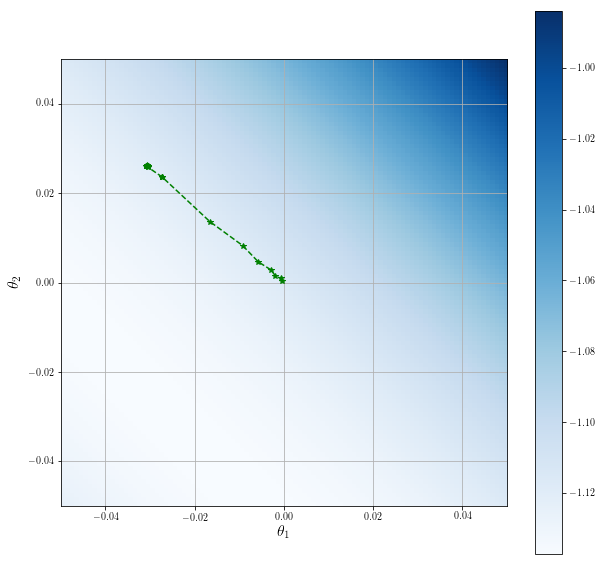

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(E_nelder_mead,cmap='Blues',extent=[-0.05,0.05,-0.05,0.05])
plt.colorbar()
plt.plot(t1,t2,'g--*')
plt.grid()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)

In [106]:
vqe_inst1 = VQE(minimizer=minimize,minimizer_kwargs={'method': 'Powell'})

In [107]:
angle=[0.0,0.0]
x = vqe_inst1.vqe_run(h2_bk, hamiltonian_bk, angle, None, qvm=qvm,disp=print,return_all=True)

                     models will be ineffective
	Parameters: [-5.65606208e-02 -2.65414045e-05] 
	E => -1.1372701597055361
	Parameters: [-5.65605881e-02 -2.65084657e-05] 
	E => -1.1372701597060069


In [109]:
E=[]
thetas1=np.linspace(-0.05,0.00003,100)
thetas2=np.linspace(-0.05,0.00003,100)
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E.append(vqe_inst1.expectation(h2_bk(param), hamiltonian_bk, None, qvm))
        

In [110]:
E_pow=np.array(E).reshape(100,100)
E_powell=E_pow.transpose()

In [111]:
param_powell=[-5.65606208e-02]
hasil_powell=[-2.65414045e-05]

Text(0,0.5,'$\\theta_2$')

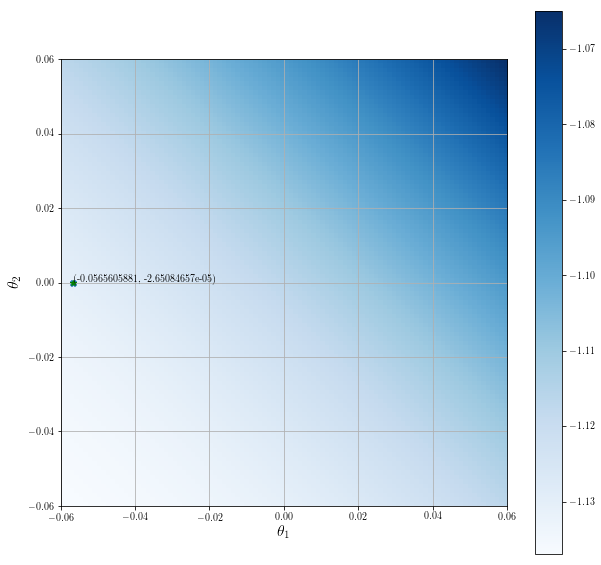

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(E_powell,cmap='Blues',extent=[-0.06,0.06,-0.06,0.06])
plt.colorbar()
plt.plot(param_powell,hasil_powell,'g--*')
plt.scatter(-5.65605881e-02  ,-2.65084657e-05,marker='X')
plt.text(-5.65605881e-02  ,-2.65084657e-05, '({}, {})'.format(-5.65605881e-02  ,-2.65084657e-05))
plt.grid()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)

In [118]:
vqe_inst2 = VQE(minimizer=minimize,minimizer_kwargs={'method': 'SLSQP'})

In [119]:
result_slsqp = vqe_inst2.vqe_run(h2_bk, hamiltonian_bk, angle, None, qvm=qvm,disp=print,return_all=True)
print(result_slsqp)

                     models will be ineffective
	Parameters: [-0.72515514  0.72515489] 
	E => -1.116684397890989
	Parameters: [-0.02820851  0.02820817] 
	E => -1.1337127290092097
	Parameters: [-0.02820851  0.02820817] 
	E => -1.1372700767578412
{'x': array([-0.02820851,  0.02820817]), 'fun': -1.1372700767352169, 'iteration_params': [array([-0.02820851,  0.02820817]), array([-0.02820851,  0.02820817]), array([-0.02820851,  0.02820817])], 'expectation_vals': [-1.116684397890989, -1.1337127290092097, -1.1372700767578412]}


In [121]:
E=[]
thetas1=np.linspace(-0.8,-0.03,100)
thetas2=np.linspace(-0.8,-0.03,100)
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E.append(vqe_inst2.expectation(h2_bk(param), hamiltonian_bk, None, qvm))

In [122]:
E_sls=np.array(E).reshape(100,100)
E_slsqp=E_sls.transpose()

In [123]:
param_slsqp=[-0.72515514,-0.02820851]
hasil_slsqp=[0.72515489,0.02820817]

Text(0,0.5,'$\\theta_2$')

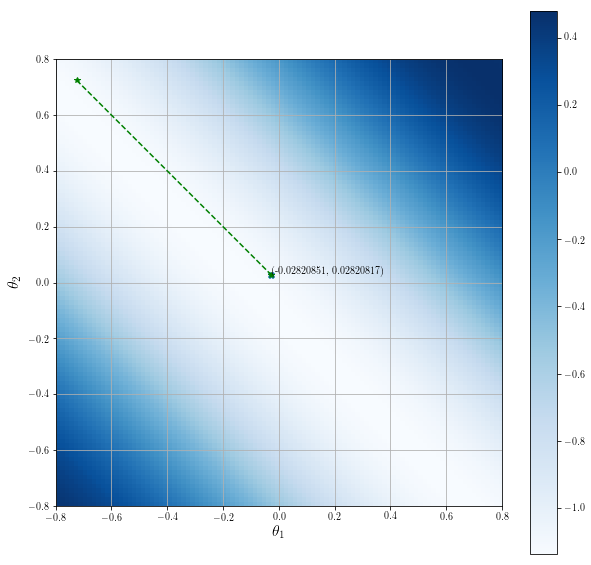

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(E_slsqp,cmap='Blues',extent=[-0.8,0.8,-0.8,0.8])
plt.colorbar()
plt.plot(param_slsqp,hasil_slsqp,'g--*')
plt.scatter(-0.02820851  ,0.02820817,marker='X')
plt.text(-0.02820851  ,0.02820817, '({}, {})'.format(-0.02820851  ,0.02820817))
plt.grid()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)